In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.9 GB  | Proc size: 120.1 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [0]:
!kill -9 -1

In [0]:
import numpy as n
import pandas as p

In [0]:
from google.colab import files
files.upload()

In [19]:
from scipy.io import arff

d = arff.loadarff("trainProdSelection.arff")

df = pd.DataFrame(d[0])
df.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,b'student',b'spend>saving',6.0,40.0,13.62,3.2804,b'C1'
1,b'student',b'spend>saving',11.0,21.0,15.32,2.0232,b'C1'
2,b'student',b'spend>saving',7.0,64.0,16.55,3.1202,b'C1'
3,b'student',b'spend>saving',3.0,47.0,15.71,3.4022,b'C1'
4,b'student',b'spend>saving',15.0,10.0,16.96,2.2825,b'C1'


In [20]:

df.shape

(186, 7)

In [21]:
df.label.unique()

array([b'C1', b'C2', b'C3', b'C4', b'C5'], dtype=object)

In [0]:
df.Type = df.Type.str.decode("utf-8")
df.LifeStyle = df.LifeStyle.str.decode("utf-8")
df.label =  df.label.str.decode("utf-8")


In [23]:
df.head(5)

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,6.0,40.0,13.62,3.2804,C1
1,student,spend>saving,11.0,21.0,15.32,2.0232,C1
2,student,spend>saving,7.0,64.0,16.55,3.1202,C1
3,student,spend>saving,3.0,47.0,15.71,3.4022,C1
4,student,spend>saving,15.0,10.0,16.96,2.2825,C1


In [24]:
df.Type.value_counts()

engineer     49
professor    39
student      38
doctor       37
librarian    23
Name: Type, dtype: int64

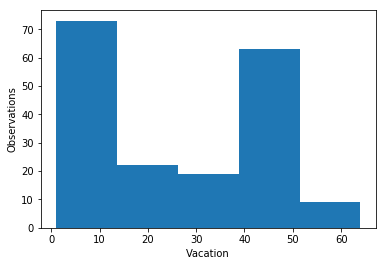

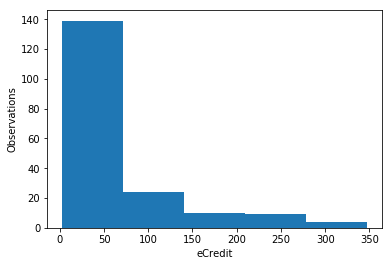

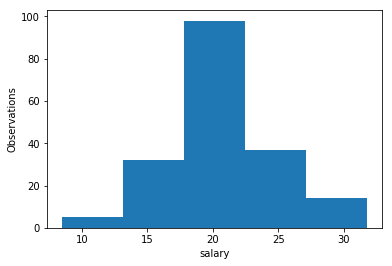

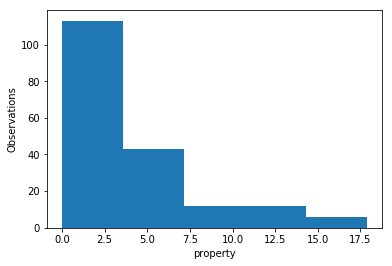

In [25]:
%matplotlib inline
from matplotlib import pyplot as p
for i in ["Vacation","eCredit","salary","property"]:
    p.hist(df[i],bins=5)
    p.xlabel(i)
    p.ylabel("Observations")
    p.show()

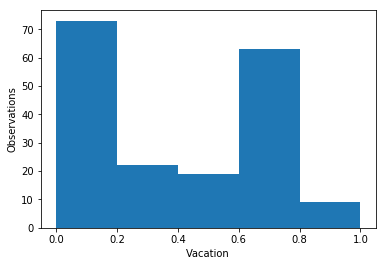

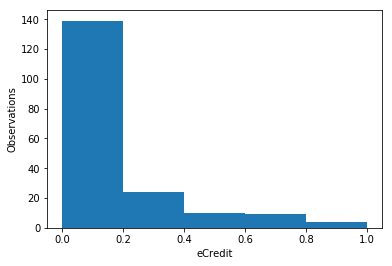

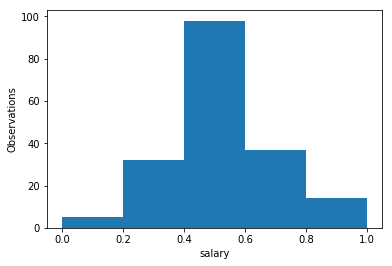

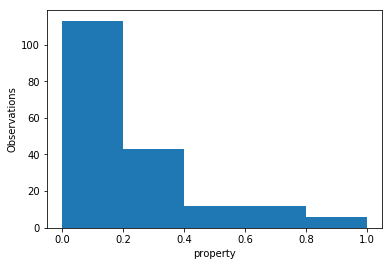

In [26]:
mi1 = [df['Vacation'].min(),df.eCredit.min(),df.salary.min(),df.property.min()]
ma1 = [df.Vacation.max(),df.eCredit.max(),df.salary.max(),df.property.max()]
df.Vacation=df['Vacation'].apply(lambda x : (x-mi1[0])/(ma1[0]-mi1[0]))

df.eCredit=df['eCredit'].apply(lambda x : (x-mi1[1])/(ma1[1]-mi1[1]))

df.salary=df['salary'].apply(lambda x : (x-mi1[2])/(ma1[2]-mi1[2]))

df.property=df['property'].apply(lambda x : (x-mi1[3])/(ma1[3]-mi1[3]))
for i in ["Vacation","eCredit","salary","property"]:
    p.hist(df[i],bins=5)
    p.xlabel(i)
    p.ylabel("Observations")
    p.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

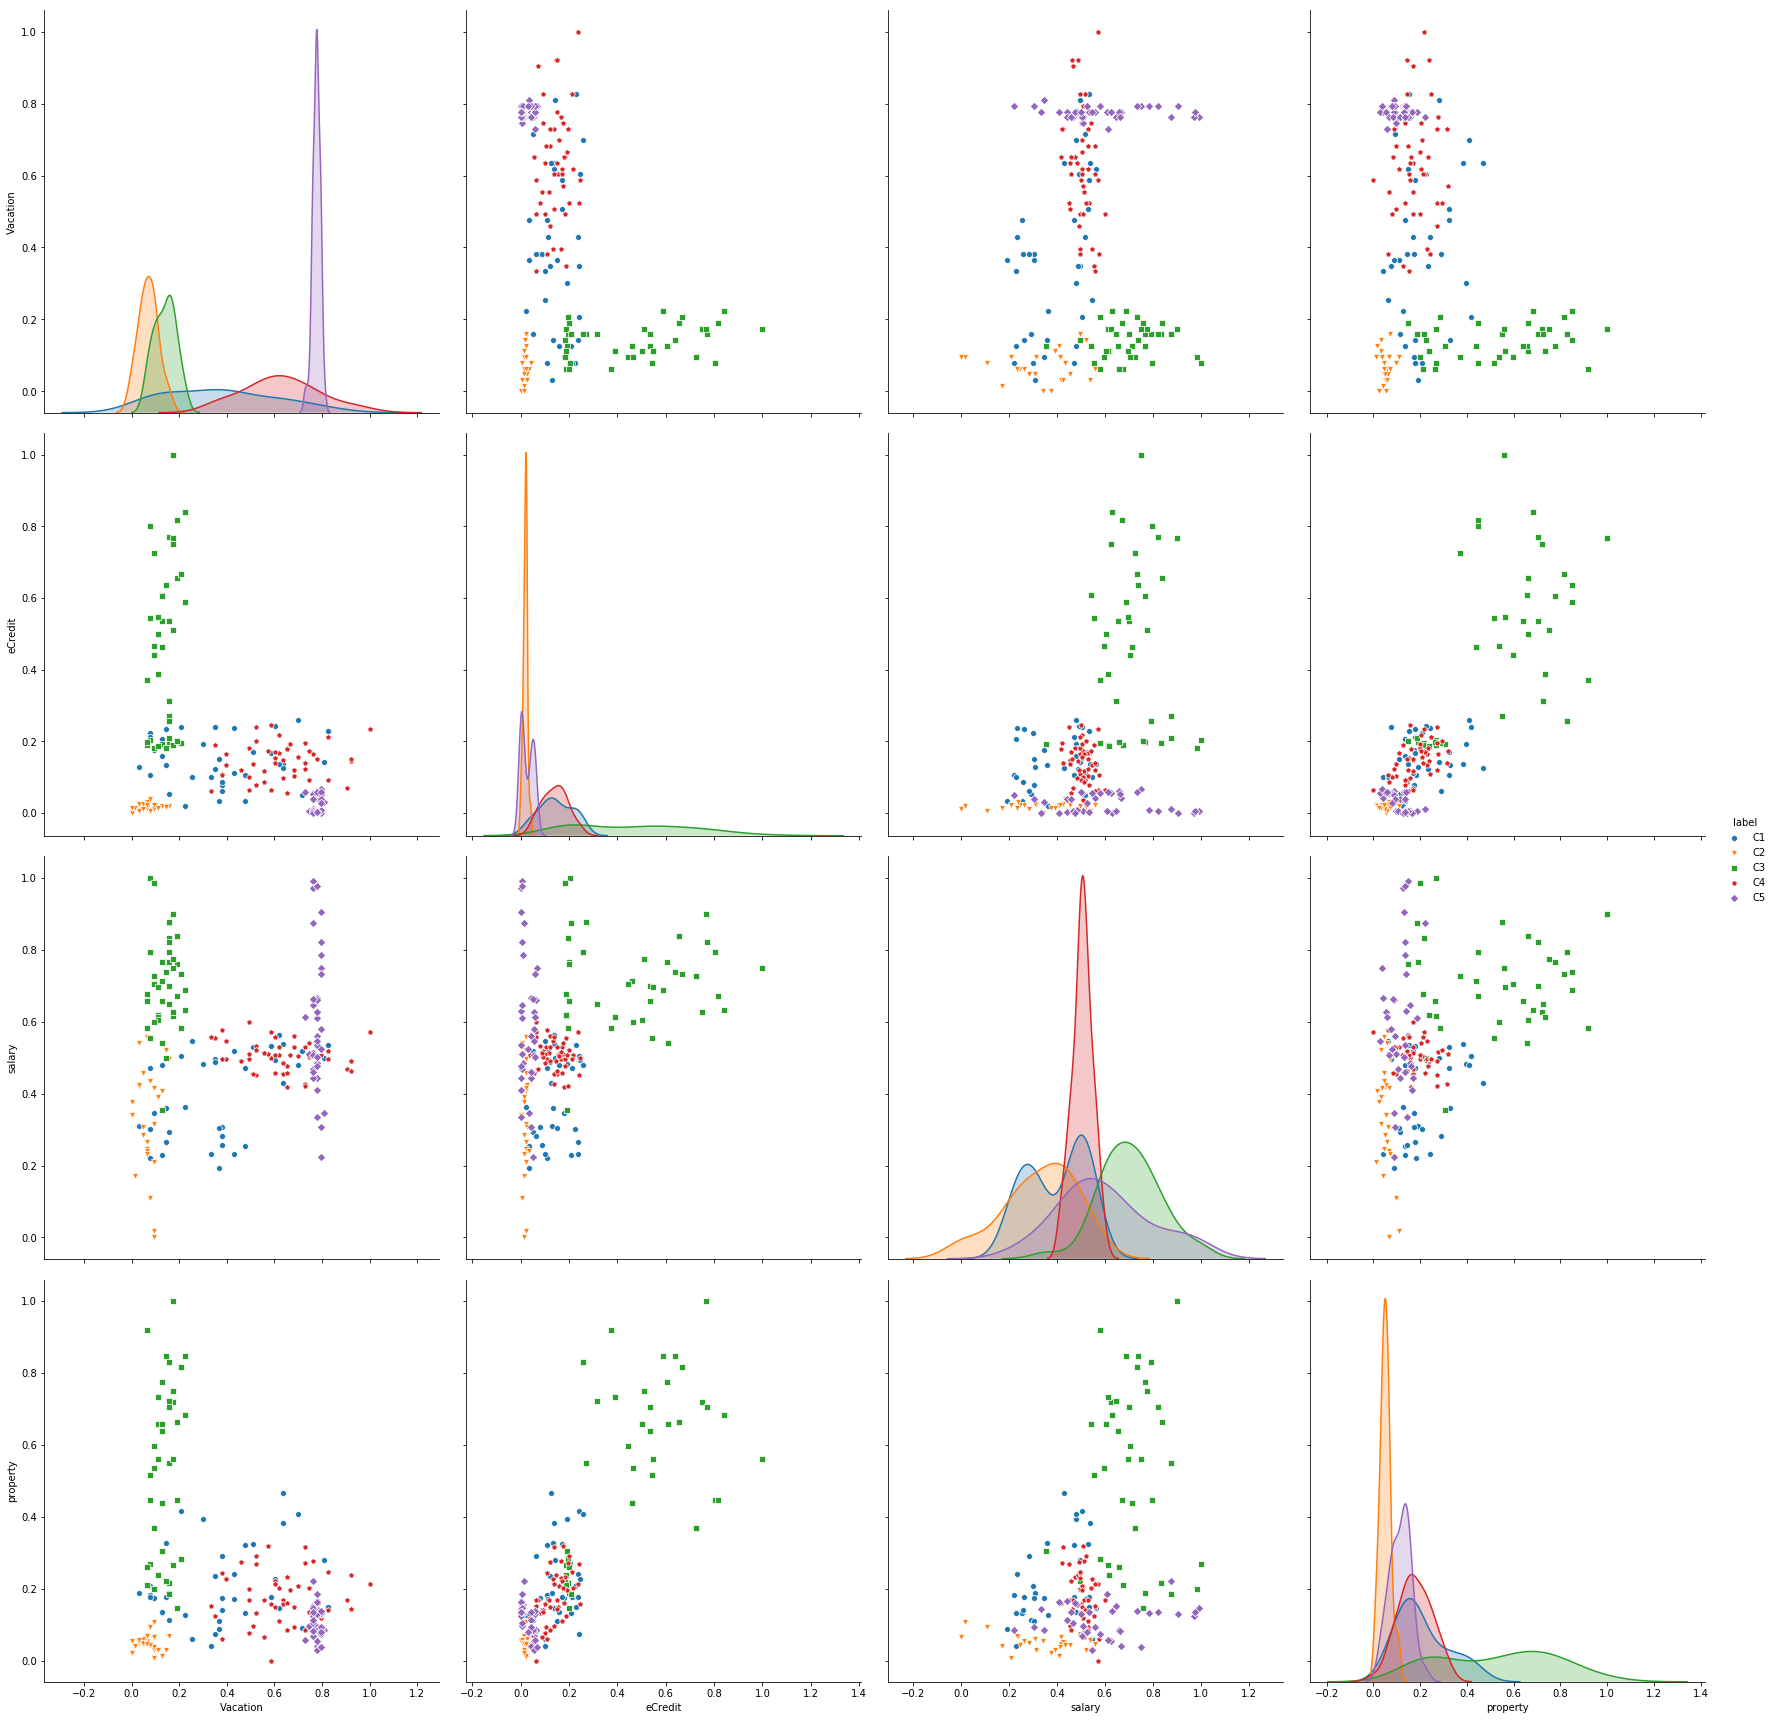

In [27]:
import seaborn as s
t_df = df.copy()
p.figure()
s.pairplot(t_df, hue = 'label', size=6, markers=["o", "v", "s","p","D"])
p.show()

In [77]:
sM = pd.read_excel("similaritymatrix.xls",index_col=0)
sM

,student,engineer,librarian,professor,doctor
student,1,0,0,0,0.0
engineer,0,1,0,0,0.0
librarian,0,0,1,0,0.0
professor,0,0,0,1,0.0
doctor,0,0,0,0,1.0
NaN,NaN,NaN,NaN,NaN,NaN
NaN,spend<<saving,spend<saving,spend>saving,spend>>saving,NaN
spend<<saving,1,0,0,0,NaN
spend<saving,0,1,0,0,NaN
spend>saving,0,0,1,0,NaN


In [78]:
c_t=sM[:5]
l = sM[7:]
l

,student,engineer,librarian,professor,doctor
spend<<saving,1,0,0,0,NaN
spend<saving,0,1,0,0,NaN
spend>saving,0,0,1,0,NaN
spend>>saving,0,0,0,1,NaN


In [79]:
l.columns = ["spend<<saving","spend<saving","spend>saving","spend>>saving","None"]
l.drop(['None'],axis=1)

,spend<<saving,spend<saving,spend>saving,spend>>saving
spend<<saving,1,0,0,0
spend<saving,0,1,0,0
spend>saving,0,0,1,0
spend>>saving,0,0,0,1


In [80]:
c_t

,student,engineer,librarian,professor,doctor
student,1,0,0,0,0.0
engineer,0,1,0,0,0.0
librarian,0,0,1,0,0.0
professor,0,0,0,1,0.0
doctor,0,0,0,0,1.0


In [81]:
df_t = df[:162]
df_v = df[162:]
df_t.tail()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
157,professor,spend>saving,0.761905,0.005814,0.469504,0.104541,C5
158,professor,spend>saving,0.777778,0.000000,0.335697,0.143885,C5
159,professor,spend>>saving,0.761905,0.005814,0.645476,0.154251,C5
160,professor,spend>>saving,0.777778,0.005814,0.611056,0.186268,C5
161,professor,spend>>saving,0.777778,0.000000,0.476818,0.161874,C5


In [82]:
df_t = df_t.sample(frac=1).reset_index(drop=True)
df_t.tail()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
157,student,spend>saving,0.142857,0.183140,0.498331,0.223070,C3
158,professor,spend>saving,0.047619,0.026163,0.307412,0.061862,C2
159,engineer,spend>>saving,0.634921,0.125000,0.429921,0.466665,C1
160,professor,spend<saving,0.063492,0.023256,0.557503,0.046335,C2
161,doctor,spend<saving,0.920635,0.145349,0.490156,0.239319,C4


In [83]:
import operator
class knn(object):
    
    def __init__(self,neighbors=None,matrix1=None,matrix2=None,minV=None,maxV=None):
        self.trainData_X = None
        self.trainData_Y = None
        self.neighbors = neighbors
        self.similaritiesMatrix1 = matrix1
        self.similaritiesMatrix2 = matrix2
        self.maxValues = maxV
        self.minValues = minV
        
    def fit(self,X,Y):
        self.trainData_X = X
        self.trainData_Y = Y
    
    def similarities(self,x1,x2):     
        d= np.square(self.similaritiesMatrix1[x1[0]][x2[0]])
        d+= np.square(self.similaritiesMatrix2[x1[1]][x2[1]])
        for i in range(2,len(x1)):
            mn,mx = self.minValues[str(i)],self.maxValues[str(i)]
            if mx !=None or mn!=None:
                d+= np.square((x1[i]-x2[i])/(mx-mn))
        return np.sqrt(d)   
    
    def Votes(self,lst):
        mode = [None]
        mx=0
        for i in range(len(lst)):
            c=0
            for j in range(len(lst)):
                if lst[i]==lst[j]:
                    c+=1
            if mx<c:
                if lst[i] not in mode:
                    mode[0] = lst[i]
                mx = c
            elif mx==c:
                if lst[i] not in mode:
                    mode.append(lst[i])
        if not mode[0]:
            return lst
        return mode[0]
     
    def predict(self,X_test,Y_test):
        if not self.neighbors:
            self.neighbors = 3
        predictClass = []
        for e in range(len(X_test)):
            distances={}
            for x_i in range(len(self.trainData_X)):
                dist = self.similarities(X_test[e],self.trainData_X[x_i])
                distances[x_i] = dist
            sorted_d = sorted(distances.items(),key=operator.itemgetter(1))
            kneighbors = [self.trainData_Y[x[0]] for x in sorted_d[:self.neighbors]]
            kVotes = self.Votes(kneighbors)
            predictClass.append(kVotes)            
        return predictClass
minValues = {"1":None,"2":None,"3":df['Vacation'].min(),"4":df.eCredit.min(),"5":df.salary.min(),"6":df.property.min()}
maxValues = {"1":None,"2":None,"3":df.Vacation.max(),"4":df.eCredit.max(),"5":df.salary.max(),"6":df.property.max()}
model_valid = knn(neighbors=3,matrix1=c_t,matrix2=l,minV=minValues,maxV=maxValues)
model_valid.fit(df_t.values[:,[0,1,2,3,4,5]],df_t.values[:,[6]])
pred_train = model_valid.predict(df_t.values[:,[0,1,2,3,4,5]],df_t.values[:,[6]])
pred_valid=model_valid.predict(df_v.values[:,[0,1,2,3,4,5]],df_v.values[:,[6]])
a = pd.Series(pred_valid).value_counts()
b = pd.Series(pred_train).value_counts()
a

[C2]    9
[C4]    6
[C3]    4
[C5]    4
[C1]    1
dtype: int64

In [84]:
from sklearn.metrics import confusion_matrix
b/len(df_t)

[C4]    0.469136
[C1]    0.283951
[C2]    0.179012
[C3]    0.037037
[C5]    0.030864
dtype: float64

In [85]:
a/len(df_v)

[C2]    0.375000
[C4]    0.250000
[C3]    0.166667
[C5]    0.166667
[C1]    0.041667
dtype: float64

In [86]:
model_valid1 = knn(neighbors=3,matrix1=c_t,matrix2=l,minV=minValues,maxV=maxValues)
model_valid1.fit(df_t.values[:,[0,1,2,3,4]],df_t.values[:,[6]])
pred_prp=model_valid1.predict(df_t.values[:,[0,1,2,3,4]],df_t.values[:,[6]])
c = pd.Series(pred_prp).value_counts()
dataTest = arff.loadarff("testProdSelection.arff")
df_test = pd.DataFrame(dataTest[0])
minValues2 = [df_test['Vacation'].min(),df_test.eCredit.min(),df_test.salary.min(),df_test.property.min()]
maxValues2 = [df_test.Vacation.max(),df_test.eCredit.max(),df_test.salary.max(),df_test.property.max()]
df_test.Type = df_test.Type.str.decode('utf-8')
df_test.LifeStyle = df_test.LifeStyle.str.decode('utf-8')
df_test.label = df_test.label.str.decode('utf-8')
df_test.head(5)

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend<saving,12.0,19.0,14.7900,3.7697,C1
1,student,spend>>saving,29.0,10.0,16.1900,2.4839,C1
2,student,spend<<saving,28.0,60.0,15.4600,1.1885,C1
3,engineer,spend>saving,15.0,41.0,21.2600,1.4379,C1
4,librarian,spend<saving,2.0,9.0,19.7207,0.6913,C1


In [87]:
df_test.eCredit=df_test['eCredit'].apply(lambda x : (x-minValues2[1])/(maxValues2[1]-minValues2[1]))
df_test.salary=df_test['salary'].apply(lambda x : (x-minValues2[2])/(maxValues2[2]-minValues2[2]))
df_test.Vacation=df_test['Vacation'].apply(lambda x : (x-minValues2[0])/(maxValues2[0]-minValues2[0]))
df_test.property=df_test['property'].apply(lambda x : (x-minValues2[3])/(maxValues2[3]-minValues2[3]))
x_test = df_test.values
x_test.shape

(21, 7)

In [88]:
print(minValues)
print(maxValues)

{'1': None, '2': None, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0}
{'1': None, '2': None, '3': 1.0, '4': 1.0, '5': 1.0, '6': 1.0}


In [89]:
x = df.values
X = x[:,[0,1,2,3,4]]
Y=x[:,6]
y_test = x_test[:,6]
x_test = x_test[:,[0,1,2,3,4]]
model = knn(neighbors=5,matrix1=c_t,matrix2=l,minV = minValues,maxV = maxValues)
model.fit(X,Y)
predTest = model.predict(x_test,y_test)
df.corr(method="pearson")

,Vacation,eCredit,salary,property
Vacation,1.000000,-0.355139,0.110022,-0.296422
eCredit,-0.355139,1.000000,0.408194,0.830698
salary,0.110022,0.408194,1.000000,0.427750
property,-0.296422,0.830698,0.427750,1.000000


In [90]:
len(predTest)

21

In [91]:
a=pd.Series(y_test).value_counts()
pd.Series(predTest).tolist()

['C2',
 'C2',
 'C2',
 'C4',
 'C5',
 'C1',
 'C2',
 'C1',
 'C3',
 'C1',
 'C3',
 'C1',
 'C1',
 'C1',
 'C4',
 'C4',
 'C4',
 'C1',
 'C2',
 'C5',
 'C2']

In [92]:
r=pd.Series(predTest).value_counts()
round((r/len(predTest))*100,2)

C1    33.33
C2    28.57
C4    19.05
C5     9.52
C3     9.52
dtype: float64

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predTest)

0.3333333333333333

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
temp = df.copy()
test_temp = df_test.copy()
label = preprocessing.LabelEncoder()
temp_Y=temp.label.unique().tolist()
test_temp_Y = test_temp.label.unique().tolist()
temp_Y

['C1', 'C2', 'C3', 'C4', 'C5']

In [95]:
encoder = preprocessing.LabelEncoder()
test_encoder= preprocessing.LabelEncoder()
encoder.fit(temp_Y)

LabelEncoder()

In [96]:
test_encoder.fit(test_temp_Y)

LabelEncoder()

In [97]:
temp.label = encoder.transform(temp.label)
test_temp.label = test_encoder.transform(test_temp.label)
test_temp.label.value_counts()

0    21
Name: label, dtype: int64

In [98]:
temp.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,0.079365,0.107558,0.219960,0.183167,0
1,student,spend>saving,0.158730,0.052326,0.293102,0.112797,0
2,student,spend>saving,0.095238,0.177326,0.346023,0.174200,0
3,student,spend>saving,0.031746,0.127907,0.309882,0.189984,0
4,student,spend>saving,0.222222,0.020349,0.363663,0.127311,0


In [99]:

test_temp.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend<saving,0.20,0.058824,0.104637,0.398926,0
1,student,spend>>saving,0.54,0.021008,0.175059,0.243041,0
2,student,spend<<saving,0.52,0.231092,0.138339,0.085992,0
3,engineer,spend>saving,0.26,0.151261,0.430086,0.116229,0
4,librarian,spend<saving,0.00,0.016807,0.352657,0.025714,0


In [100]:
temp_dummy = pd.get_dummies(temp)
test_dummy = pd.get_dummies(test_temp)
print(list(test_dummy))

['Vacation', 'eCredit', 'salary', 'property', 'label', 'Type_doctor', 'Type_engineer', 'Type_librarian', 'Type_professor', 'Type_student', 'LifeStyle_spend<<saving', 'LifeStyle_spend<saving', 'LifeStyle_spend>>saving', 'LifeStyle_spend>saving']


In [101]:
temp_dummy.head()

,Vacation,eCredit,salary,property,label,Type_doctor,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<<saving,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,0.079365,0.107558,0.219960,0.183167,0,0,0,0,0,1,0,0,0,1
1,0.158730,0.052326,0.293102,0.112797,0,0,0,0,0,1,0,0,0,1
2,0.095238,0.177326,0.346023,0.174200,0,0,0,0,0,1,0,0,0,1
3,0.031746,0.127907,0.309882,0.189984,0,0,0,0,0,1,0,0,0,1
4,0.222222,0.020349,0.363663,0.127311,0,0,0,0,0,1,0,0,0,1


In [102]:
test_dummy.head()

,Vacation,eCredit,salary,property,label,Type_doctor,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<<saving,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,0.20,0.058824,0.104637,0.398926,0,0,0,0,0,1,0,1,0,0
1,0.54,0.021008,0.175059,0.243041,0,0,0,0,0,1,0,0,1,0
2,0.52,0.231092,0.138339,0.085992,0,0,0,0,0,1,1,0,0,0
3,0.26,0.151261,0.430086,0.116229,0,0,1,0,0,0,0,0,0,1
4,0.00,0.016807,0.352657,0.025714,0,0,0,1,0,0,0,1,0,0


In [103]:
knnModel = KNeighborsClassifier(n_neighbors=3)
temp_y = temp_dummy['label']
temp_x = temp_dummy.drop(['label'],axis=1)
test_data = test_dummy.drop(['label'],axis=1)
knnModel.fit(temp_x,temp_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [104]:
predict=knnModel.predict(test_data)
a=pd.Series(predict).value_counts()
round((a/len(predict)),4)

0    0.2857
4    0.1905
2    0.1905
1    0.1905
3    0.1429
dtype: float64

In [105]:
pd.crosstab(index=test_dummy.label,columns=predict)

col_0,0,1,2,3,4
label,,,,,
0,6,4,4,3,4
